In [22]:
import numpy as np
import matplotlib.pyplot as plt


In [23]:
def newtons_method(G, d, tol=1e-6, max_iter=100):
    """
    Solves min ||Gm - d||^2 using Newton's method.
    This helps us find the model m (e.g., slowness or velocity) that best explains the observed data 
    d, given the forward operator G

    Parameters:
    - G: Forward matrix (e.g., path lengths)
    - d: Observed data (e.g., travel times)
    - tol: Convergence threshold
    - max_iter: Max iterations

    Returns:
    - m: Estimated model parameters
    - misfits: Misfit at each iteration
    - models: Model values at each iteration
    """
    ## We start with an initial guess for the model parameters (all zeros)
    m = np.zeros(G.shape[1])  # initial guess

    ## The Hessian H is the matrix of second derivatives of the misfit
    H = G.T @ G               # Hessian (constant for linear least squares)

    initial_misfit = 0.5 * np.linalg.norm(G @ m - d) ** 2
    misfits = [initial_misfit]
    models = [m.copy()]


    # Loop through a maximum number of iterations (usually only one is enough for linear problems)
    for i in range(max_iter):
        # Compute the gradient of the misfit function
        # The gradient is the first derivative of the misfit function
        # The misfit function is ||Gm - d||^2, and its gradient is 2 * G^T * (Gm - d)
        # This tells us the direction in which the misfit increases most
        grad = G.T @ (G @ m - d)  # gradient

        # Instead of computing inverse of H, we solve the linear system H * delta = grad
        # This is more efficient and numerically stable
        # delta is the change in model parameters we need to apply
        delta = np.linalg.solve(H, grad)  # solve H * delta = grad

        # Update the model parameters
        m_new = m - delta

        # Compute misfit (0.5 * L2 norm squared)
        misfit = 0.5 * np.linalg.norm(G @ m_new - d) ** 2
        misfits.append(misfit)
        models.append(m_new.copy())

        # Check if the change in model parameters is smaller than a tolerance
        if np.linalg.norm(m_new - m) < tol:
            print(f"Converged after {i+1} iterations.")
            break
        m = m_new

    return m, misfits, np.array(models)

In [24]:
# Simulate forward problem
np.random.seed(0)

## Simulates the forward matrix G and observed data d
G = np.random.rand(50, 3) #50 seismic ray paths through 3 layers, with each column of G representing the path length of each ray in that layer
true_m = np.array([2.0, 1.5, 3.0]) #true slowness values (reciprocal of velocity) for the 3 layers
d = G @ true_m + np.random.normal(0, 0.1, size=50) #generate synthetic observed travel times d with some noise
# The observed data d is the product of G and the true model m, plus some noise
# The noise simulates the uncertainty in the observed data

# Solve with Newton's method
estimated_m, misfits, models = newtons_method(G, d)

print("True model:     ", true_m)
print("Estimated model:", estimated_m)


Converged after 2 iterations.
True model:      [2.  1.5 3. ]
Estimated model: [2.06213683 1.50935735 2.94306564]


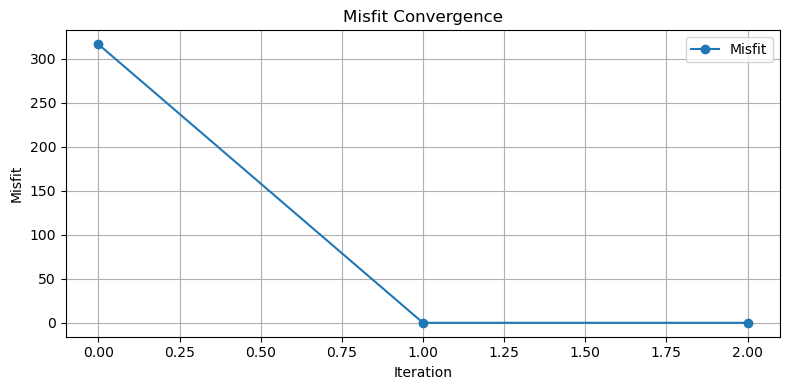

In [25]:
# === Plot: Misfit vs Iteration ===
plt.figure(figsize=(8, 4))
plt.plot(misfits, marker='o', label='Misfit')
plt.xlabel("Iteration")
plt.ylabel("Misfit")
plt.title("Misfit Convergence")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


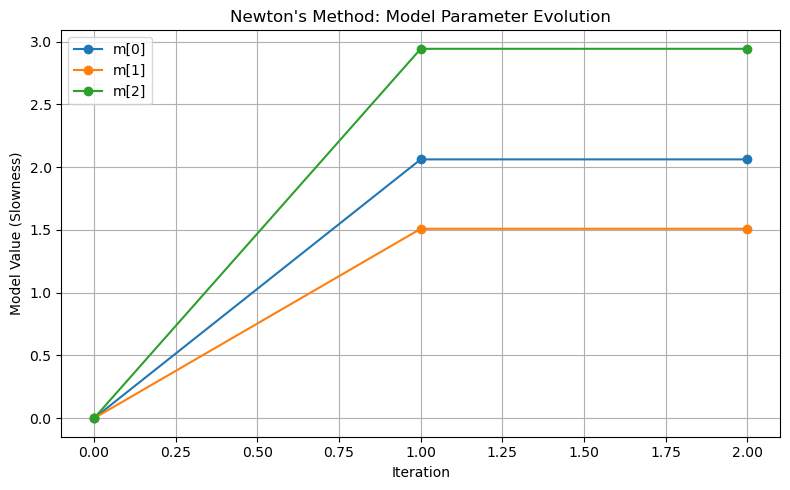

In [26]:
# === Plot: Model Parameter Evolution ===
plt.figure(figsize=(8, 5))
for i in range(models.shape[1]):
    plt.plot(models[:, i], marker='o', label=f'm[{i}]')
plt.xlabel("Iteration")
plt.ylabel("Model Value (Slowness)")
plt.title("Newton's Method: Model Parameter Evolution")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()